We will now load the IMDB dataset and quickly do all necessary preprocessing

In [5]:
# %load ghc_code_python_viz.py
# obtain dataset from https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

# loading imdb data into a python list format

import csv
imdb_data_csv= csv.reader(open('movie_metadata.csv'))
imdb_data=[]
for item in imdb_data_csv:
    imdb_data.append(item)
print "I have successfully loaded my data!..."

I have successfully loaded my data!...


In [2]:
verbose_level=1;

import random;
random.seed(42)

# total number of records
print "number of records: ",len(imdb_data), "number of attributes in each record: ", len(imdb_data[0])

# main categories [columns in data]
print imdb_data[0]

number of records:  5044 number of attributes in each record:  28
['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']


In [3]:
# regression example, input all fields, output -> imdb score

# step 1: preprocessing
# remove NAN values from the data
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
def remove_NAN(data):
     imp=Imputer(missing_values='nan',strategy="mean",axis=0)
     imp.fit_transform(data)
     return data

#one hot encoding
def convert_text_to_numeric_onehot(data,column_nos):
    enc=OneHotEncoder(categorical_features=column_nos)
    enc.fit(data);
    return enc.transform(data);
    
# for regression we would ideally like all the fields to be numeric, therefore, convert names and other text fields into numbers
def convert_text_to_numeric(data,column_no):
    encoding={}
    curr_index = 1
    for i,item in enumerate(data):
        if item[column_no] in encoding.keys():
            data[i][column_no] = encoding[item[column_no]]
        else:
            encoding[item[column_no]] = curr_index
            data[i][column_no] = curr_index
            curr_index+=1
    return data

import ast
def toFloat(data):
    data1=[]
    for i,item in enumerate(data):
        li = []
        for x in item:
            if isinstance(x, str):
                try:	
                    li.append(float(x) if '.' in x else int(x))
                except:
                    li.append(0.0)
            else:
                li.append(x)
        data1.append(li)
    return data1

def preprocessing(imdb_data):
    # remove header
    data = imdb_data[1:]
    # convert data to nuemeric type
    data = convert_text_to_numeric(data,1)
    data = convert_text_to_numeric(data,6);data = convert_text_to_numeric(data,10);data = convert_text_to_numeric(data,14);
    data = convert_text_to_numeric(data,19);data = convert_text_to_numeric(data,20);data = convert_text_to_numeric(data,21)

    # remove remaining text columns from the data
    for row in data:
       del row[17]
       del row[16]
       del row[11]
       del row[9]
       del row[0]

    data_float = toFloat(data)
    data_np = np.matrix(data_float)
    data_np_x = np.delete(data_np, [20], axis=1)
    data_label1=data_np[:,20];

    cat_features=[0,5,8,11,14,15,16];
    data_np_onehot1 = convert_text_to_numeric_onehot(data_np_x,cat_features)
    return data_np_onehot1,data_label1
print "I just executed a whole bunch of important preprocessing steps"

I just executed a whole bunch of important preprocessing steps


In [4]:
data_np_onehot,data_label = preprocessing(imdb_data)

from sklearn.decomposition import PCA
from copy import deepcopy

pca = PCA(n_components=100)
data_pca = deepcopy(data_np_onehot.todense())
data_pca = pca.fit_transform(data_pca)
# In[16]:

# remove nanif needed
# data = remove_NAN(data_np)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_np_onehot, data_label, test_size=0.50, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(data_np_onehot, data_label, test_size=0.25, random_state=0)

x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca, data_label, test_size=0.50, random_state=0)
print "I have just executed PCA to reduce the dimensionality of my data"

I have just executed PCA to reduce the dimensionality of my data


In [5]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
#lr = linear_model.Ridge()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print 'linear regression absolute error: ', mean_absolute_error(y_test, y_pred)
print 'linear regression squared error: ',mean_squared_error(y_test, y_pred)


linear regression absolute error:  0.764055436542
linear regression squared error:  0.964451092202


In [6]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
#lr = linear_model.Ridge()
lr.fit(x_train_pca, y_train_pca)
y_pred = lr.predict(x_test_pca)

# model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print 'linear regression absolute error: ', mean_absolute_error(y_test_pca, y_pred)
print 'linear regression squared error: ',mean_squared_error(y_test_pca, y_pred)

linear regression absolute error:  0.702027001184
linear regression squared error:  0.848876898314


# Ridge Regression : 

Ridge regression is a variation of linear regression that avoids "smooths" the function learnt through "regularization" of coefficients. 

<img src="images/overfitting.jpg" width="25%" height="25%">

Ridge regularization mechanism: Minimize L2 norm : Choose coefficients with lowest sum of squares

Overfitting typically occurs due to lack of data. When we have lots of data, ridge regression tends to linear regression. 

In [7]:
x_train=x_train_pca;x_test=x_test_pca;
y_train=y_train_pca;y_test=y_test_pca;

from sklearn.linear_model import Ridge

regr_ridge = Ridge(alpha=10);
regr_ridge.fit(x_train, y_train)
y_pred = regr_ridge.predict(x_test)

# model evaluation
print 'ridge absolute error: ', mean_absolute_error(y_test, y_pred)
print 'ridge squared error: ',mean_squared_error(y_test, y_pred)

ridge absolute error:  0.696848452143
ridge squared error:  0.835635214054


## Parameter Tuning: K-fold CrossValidation:

For parameter selection, divide the training data into multiple parts, each time, take one part for validate and the remaining for train, each time alternating between the part used for validation.

<img src="images/kfold.png" width="75%" height="75%">


In [8]:
#How to choose  parameter alpha ??? We use GridSearchCV for cross validation
verbose_level=10
from sklearn.model_selection import GridSearchCV
regr_ridge = GridSearchCV(Ridge(), cv=3, verbose=verbose_level,
                  param_grid={"alpha": [ 10,1,0.1]})

regr_ridge.fit(x_train, y_train)
y_pred = regr_ridge.predict(x_test)
print(regr_ridge.best_params_);

# model evaluation
print 'ridge absolute error: ', mean_absolute_error(y_test, y_pred)
print 'ridge squared error: ',mean_squared_error(y_test, y_pred)
verbose_level=1

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] alpha=10 ........................................................
[CV] ......................... alpha=10, score=0.336096, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................... alpha=10, score=0.291597, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ......................... alpha=10, score=0.308398, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................... alpha=1, score=0.314047, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................... alpha=1, score=0.271118, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................... alpha=1, score=0.292070, total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] .............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished


# Lasso Regression : 

Lasso is another form of regularization useful when only few of the features are relevent/ sparse features. 

Laso regularization Mechanism: that penalizes sum of absolute value of coefficients (L1 norm). 
Lasso induces feature sparsity and can often be used for feature selection. 

In [9]:
verbose_level=1
from sklearn.linear_model import Lasso
regr_ls = GridSearchCV(Lasso(), cv=2, verbose=verbose_level,
                  param_grid={"alpha": [ 0.01,0.1,1,10]})
regr_ls.fit(x_train, y_train)
y_pred = regr_ls.predict(x_test)
print(regr_ls.best_params_);

# model evaluation
print 'Lasso absolute error: ', mean_absolute_error(y_test, y_pred)
print 'Lasso squared error: ',mean_squared_error(y_test, y_pred)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'alpha': 0.01}
Lasso absolute error:  0.711628265078
Lasso squared error:  0.863802536235


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


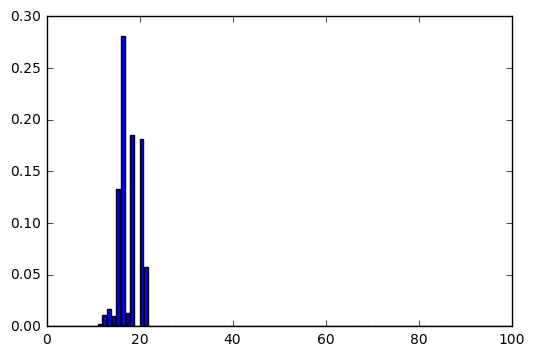

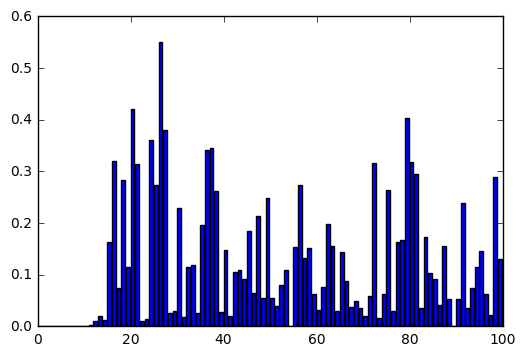

In [10]:
#Vizualization of lasso vs ridge regression
import matplotlib.pyplot as plt
lsarr=regr_ls.best_estimator_.coef_.flatten();
ridgearr=regr_ridge.best_estimator_.coef_.transpose().flatten();
#lsarr=regr_ls.best_estimator_.coef_.flatten()[0:600];
#ridgearr=regr_ridge.best_estimator_.coef_.transpose().flatten()[0:600];


lshist=np.absolute(lsarr)
ridgehist=np.absolute(ridgearr)

plt.bar(range(len(lshist)),lshist)
plt.show()

plt.bar(range(len(ridgehist)),ridgehist)
plt.show()



# Decision Tree Regression : 

Decision Tree regression is often referred to as CART (Classification and regression trees). 

<img src="images/CART.png">


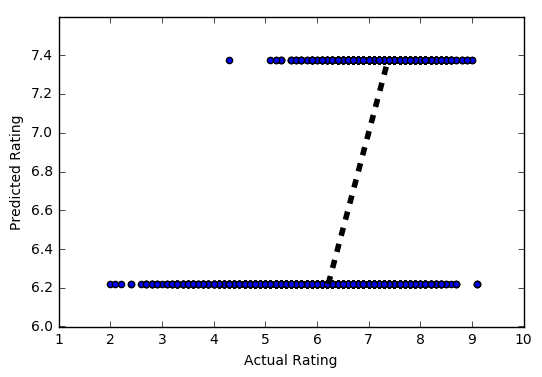

In [11]:
# Visually showing decision tree regressor
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
regr_dt = DecisionTreeRegressor(max_depth=1)
regr_dt.fit(x_train, y_train)
y_pred = regr_dt.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual Rating')
ax.set_ylabel('Predicted Rating')
plt.show()

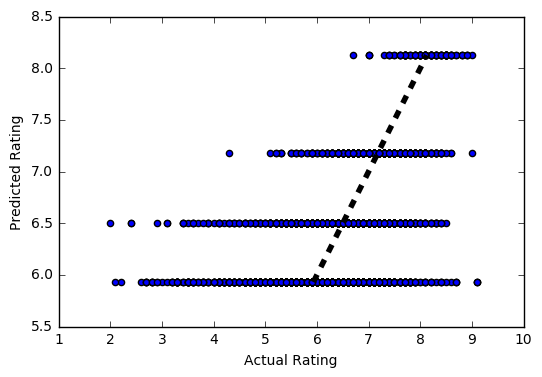

In [12]:
regr_dt = DecisionTreeRegressor(max_depth=2)
regr_dt.fit(x_train, y_train)
y_pred = regr_dt.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual Rating')
ax.set_ylabel('Predicted Rating')
plt.show()

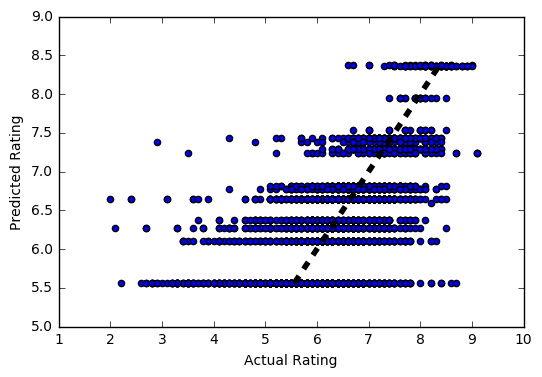

In [13]:
regr_dt = DecisionTreeRegressor(max_depth=4)
regr_dt.fit(x_train, y_train)
y_pred = regr_dt.predict(x_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual Rating')
ax.set_ylabel('Predicted Rating')
plt.show()

In [41]:
regr_dt = GridSearchCV(DecisionTreeRegressor(), cv=2, verbose=verbose_level,
                  param_grid={"max_depth": [ 2,3,4,5,6]})
#regr_dt = DecisionTreeRegressor(max_depth=2)
regr_dt.fit(x_train, y_train)
y_pred = regr_dt.predict(x_test)
print(regr_dt.best_params_);

# model evaluation
print 'decision tree absolute error: ', mean_absolute_error(y_test, y_pred)
print 'decsion tree squared error: ',mean_squared_error(y_test, y_pred)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'max_depth': 3}
decision tree absolute error:  0.724263882095
decsion tree squared error:  0.893241528374


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.7s finished


# Random Forest Regression

Random forest regression constructs an ensemble of decision trees with random partitions of data. Predictions are done by taking the average of values from multiple trees.

<img src="images/random_forest.png">


In [42]:
from sklearn.ensemble import RandomForestRegressor
regr_rf = GridSearchCV(RandomForestRegressor(), cv=2, verbose=verbose_level,
                  param_grid={"max_depth": [ 2,3,4,5]})
#regr_dt = DecisionTreeRegressor(max_depth=2)
regr_rf.fit(x_train, y_train)
y_pred = regr_rf.predict(x_test)
print(regr_rf.best_params_);

# model evaluation
print 'Random Forest absolute error: ', mean_absolute_error(y_test, y_pred)
print 'Random Forest squared error: ',mean_squared_error(y_test, y_pred)


Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.4s finished


{'max_depth': 5}
Random Forest absolute error:  0.643461798125
Random Forest squared error:  0.738675857866


# Other Kernel Based techniques for non-linear problems:

Support vector regression and kernel ridge regression with RBF kernel are common techniques for non-linear problems. 

In [ ]:
from sklearn.kernel_ridge import KernelRidge
regr_kr = GridSearchCV(KernelRidge(kernel='rbf'), cv=3, verbose=verbose_level,
                  param_grid={"alpha": [ 10,0.1,1e-3],
                              "gamma": np.logspace(-15, 15, 4)})
#regr_kr = KernelRidge(kernel='rbf',alpha=10);
regr_kr.fit(x_train, y_train)
y_pred = regr_kr.predict(x_test)
print(regr_kr.best_params_);

# model evaluation
print 'kernel ridge absolute error: ', mean_absolute_error(y_test, y_pred)
print 'kernel ridge squared error: ',mean_squared_error(y_test, y_pred)

In [ ]:
from sklearn.svm import SVR
regr_svr = GridSearchCV(SVR(C=1), cv=2, verbose=verbose_level,param_grid={"epsilon":[ 0.1,1,0.001]})
regr_svr.fit(x_train, y_train)
y_pred = regr_svr.predict(x_test)
print(regr_svr.best_params_);

# model evaluation
print 'SVR absolute error: ', mean_absolute_error(y_test, y_pred)
print 'SVR squared error: ',mean_squared_error(y_test, y_pred)


## Summary of Python Wokshop

Today we have seen : 

1. Preprocessing and Cleaning up data including handling categorical variables 

2. Principle Component Analysis (PCA) for dimensionality reduction

3. Linear Regression 

4. Ridge Regression (with L2 regularization / smoothing)

5. Parameter selection through K-Fold cross-validation

5. Lasso Regressiion (With L1 regularization / smoothing inducing sparsity)

6. Decision tree Regression

7. Random Forest Regression

Thats a lot of stuff !! Hope you had a lot of fun :-)